# Reference
https://www.datacamp.com/community/tutorials/wordcloud-python

# SETUP

In [63]:
import os
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import matplotlib.pyplot as plt
% matplotlib inline

from matplotlib import rcParams
rcParams['font.family'] = 'Hack'

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

In [14]:
!ls

Untitled.ipynb              practice_01_wordcloud.ipynb
practice_01_wordcloud.R     stevejobstandford.txt


In [36]:
data_raw = open('stevejobstandford.txt', 'r')

In [37]:
type(data_raw)

_io.TextIOWrapper

In [38]:
corpus = []

for line in data_raw:
    if not line == '\n':
        corpus.append(line)

In [39]:
for line in corpus:
    line = re.sub("\n", "", line)

In [55]:
text = ""

for line in corpus:
    text += line

In [58]:
text = re.sub("\n", " ", text)

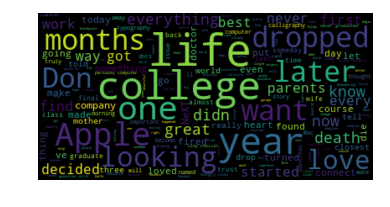

In [59]:
# Create and Generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

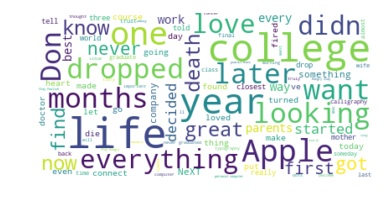

In [60]:
# 2

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
# image import

try: 
    wordcloud.to_file('img/first_review.png')
except:
    path = "/Users/quartz/Dropbox/TIL/14_visualization/img"
    os.makedirs(path)
    wordcloud.to_file('img/first_review.png')

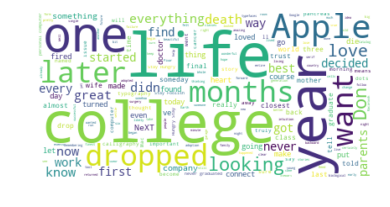

In [72]:
# stop word
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
# image putting

steve_image = np.array(Image.open("img/stevejobs.jpg"))
steve_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238]], dtype=uint8)

In [75]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [76]:
# Transform your mask into a new one that will work with the function:
transformed_steve_image = np.ndarray((steve_image.shape[0], steve_image.shape[1]), np.int32)

for i in range(len(steve_image)):
    transformed_steve_image[i] = list(map(transform_format, steve_image[i]))

In [78]:
# Check the expected result of your mask
transformed_steve_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238]], dtype=int32)

In [79]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_steve_image, stopwords=stopwords, contour_width=3, contour_color='firebrick')

In [81]:
# Generate a wc
wc.generate(text)

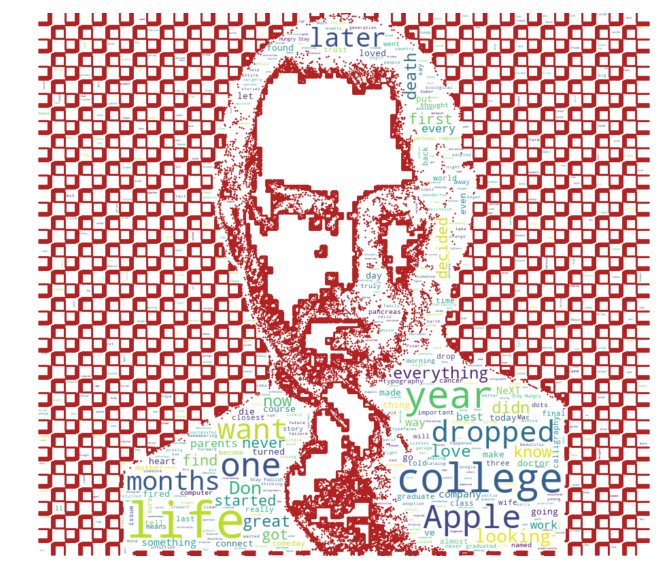

In [83]:
# store to file
wc.to_file('img/steve_image_2.png')

# show
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()